# MSA 2025 Phase 2 - Part 1

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [13]:
# load three datasets in
W_store_features = pd.read_csv(
    r"D:\MSA_PROJECT\phase2_project\data-science\1. Analysis and Preprocessing\datasets\W store sales\features.csv"
    )
W_store_sales = pd.read_csv(
    r"D:\MSA_PROJECT\phase2_project\data-science\1. Analysis and Preprocessing\datasets\W store sales\sales.csv"
    )
W_store_stores = pd.read_csv(
    r"D:\MSA_PROJECT\phase2_project\data-science\1. Analysis and Preprocessing\datasets\W store sales\stores.csv"
    )

print(f'W_store_features has {W_store_features.shape[0]} rows')
print(f'W_store_sales has {W_store_sales.shape[0]} rows')
print(f'W_store_sales has {W_store_stores.shape[0]} rows')

W_store_features has 8190 rows
W_store_sales has 421570 rows
W_store_sales has 45 rows


In [ ]:
# merge all three into one df 
# (one to many mapping,fault Cartesian product no need to concern)
df = pd.merge(W_store_features,W_store_sales,on = ["Store","Date"],how="inner")
df = pd.merge(df,W_store_stores, on = "Store", how = "inner")
df.shape[0]

421570

In [22]:
# first 10 instances
df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False,A,151315
5,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,5749.03,False,A,151315
6,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,7,21084.08,False,A,151315
7,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,8,40129.01,False,A,151315
8,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,9,16930.99,False,A,151315
9,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10,30721.50,False,A,151315


In [29]:
df.describe(include='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
count,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570,421570,421570.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,3,NaN
top,NaN,2011-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,A,NaN
freq,NaN,3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391909,NaN,NaN,391909,215478,NaN
mean,22.200546,NaN,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,NaN,44.260317,15981.258123,NaN,NaN,136727.915739
std,12.785297,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,NaN,30.492054,22711.183519,NaN,NaN,60980.583328
min,1.000000,NaN,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,NaN,1.000000,-4988.940000,NaN,NaN,34875.000000
25%,11.000000,NaN,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,NaN,18.000000,2079.650000,NaN,NaN,93638.000000
50%,22.000000,NaN,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,NaN,37.000000,7612.030000,NaN,NaN,140167.000000
75%,33.000000,NaN,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,NaN,74.000000,20205.852500,NaN,NaN,202505.000000


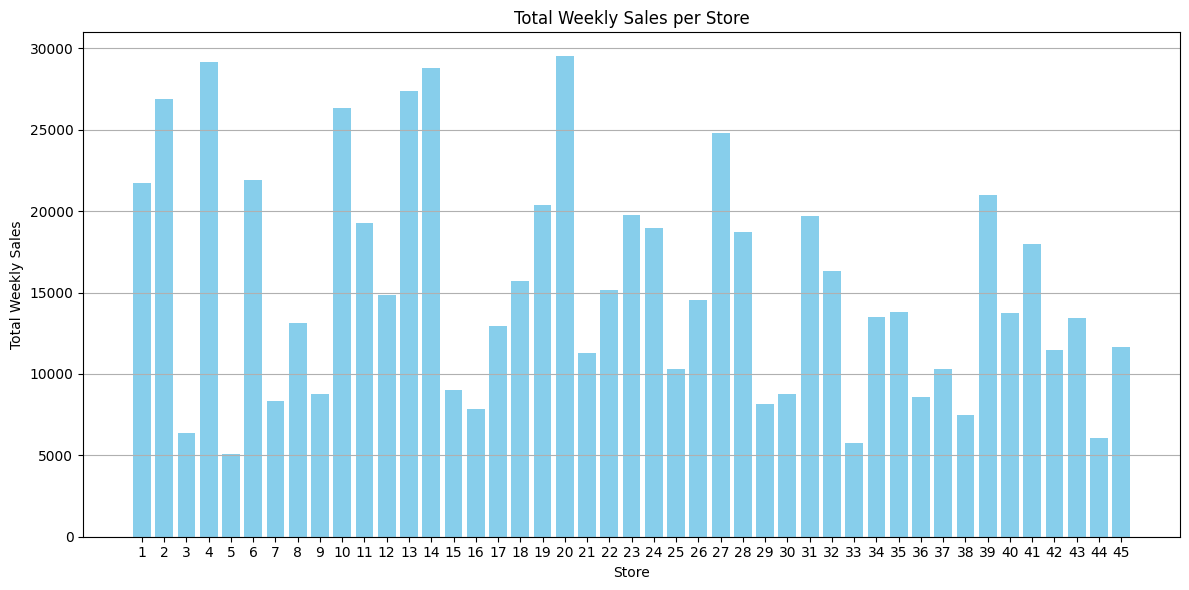

In [ ]:
store_sales = df.groupby("Store")["Weekly_Sales"].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(store_sales["Store"], store_sales["Weekly_Sales"], color='skyblue')
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.xticks(store_sales["Store"]) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

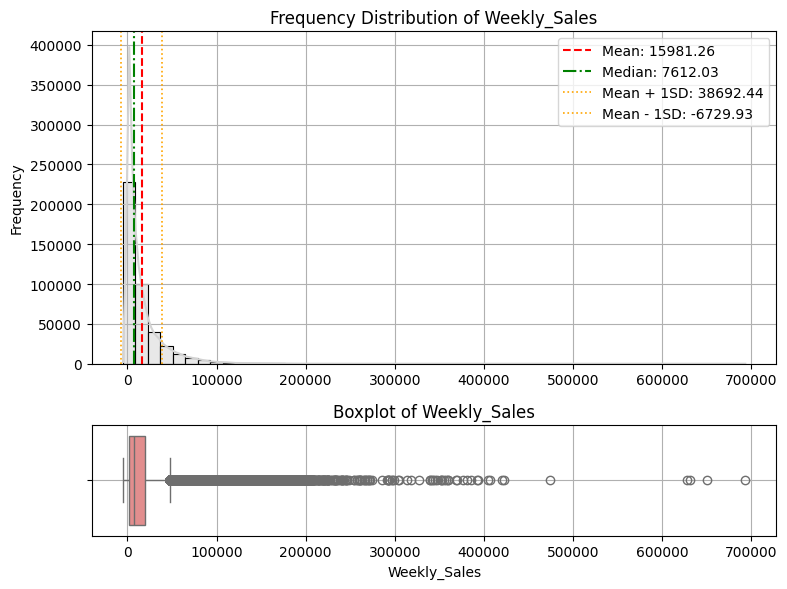

In [78]:
def show_distribution_with_stats(column):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})

    data = column.dropna()
    mean = data.mean()
    median = data.median()
    std = data.std()

    # hist
    sns.histplot(data, ax=axs[0], bins=50, kde=True,color='lightgrey')
    axs[0].axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {mean:.2f}")
    axs[0].axvline(median, color='green', linestyle='-.', linewidth=1.5, label=f"Median: {median:.2f}")
    axs[0].axvline(mean + std, color='orange', linestyle=':', linewidth=1.2, label=f"Mean + 1SD: {mean+std:.2f}")
    axs[0].axvline(mean - std, color='orange', linestyle=':', linewidth=1.2, label=f"Mean - 1SD: {mean-std:.2f}")
    axs[0].set_title(f"Frequency Distribution of {column.name}")
    axs[0].set_xlabel("")
    axs[0].set_ylabel("Frequency")
    axs[0].legend()
    axs[0].grid(True)

    # boxplot
    sns.boxplot(x=data, ax=axs[1], color='lightcoral')
    axs[1].set_title(f"Boxplot of {column.name}")
    axs[1].set_xlabel(column.name)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


show_distribution_with_stats(df["Weekly_Sales"])

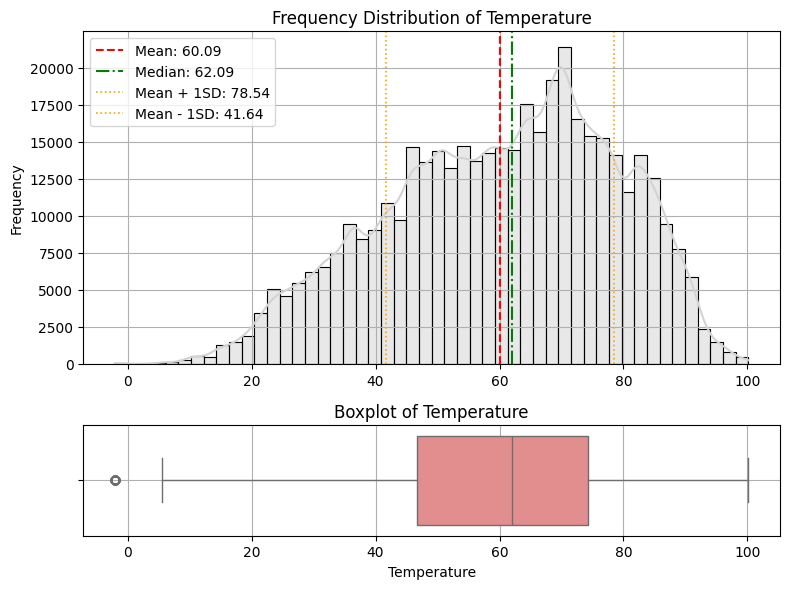

In [79]:

show_distribution_with_stats(df["Temperature"])


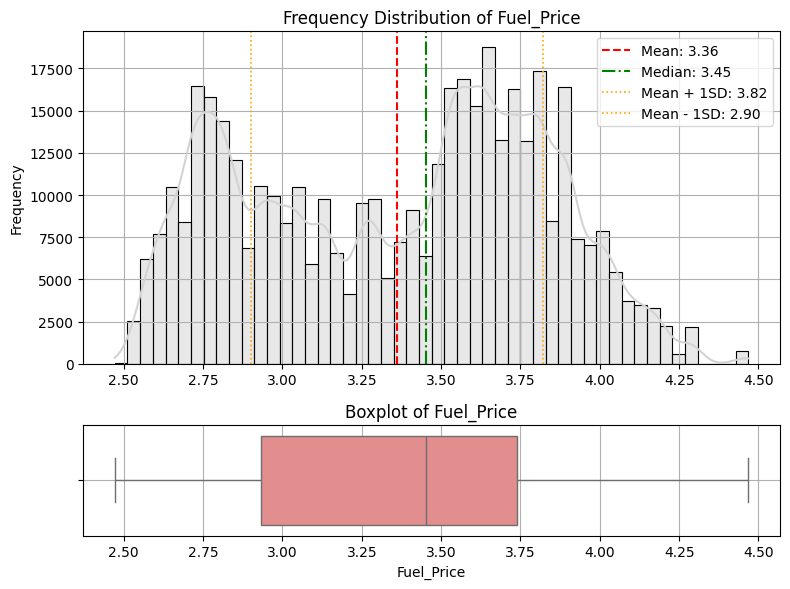

In [80]:
show_distribution_with_stats(df["Fuel_Price"])

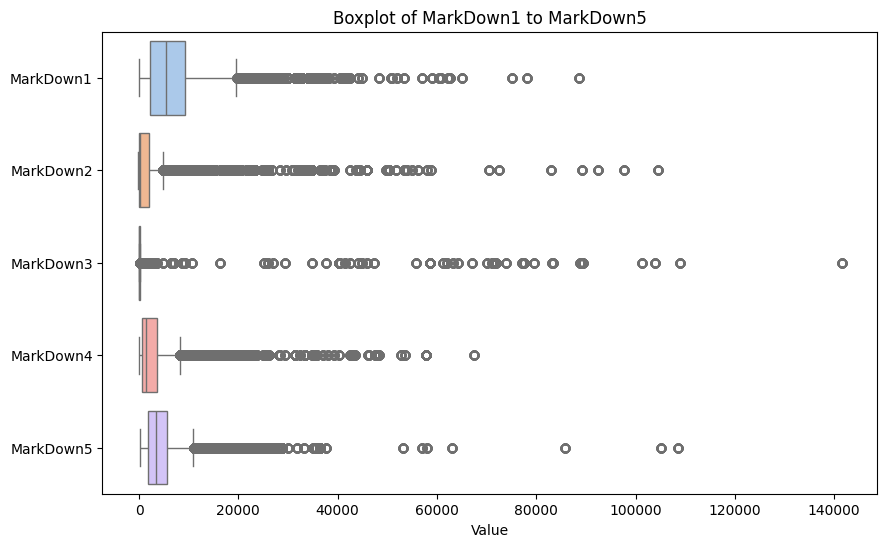

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[[f"MarkDown{i}" for i in range(1, 6)]], orient="h", palette="pastel")
plt.title("Boxplot of MarkDown1 to MarkDown5")
plt.xlabel("Value")
plt.show()

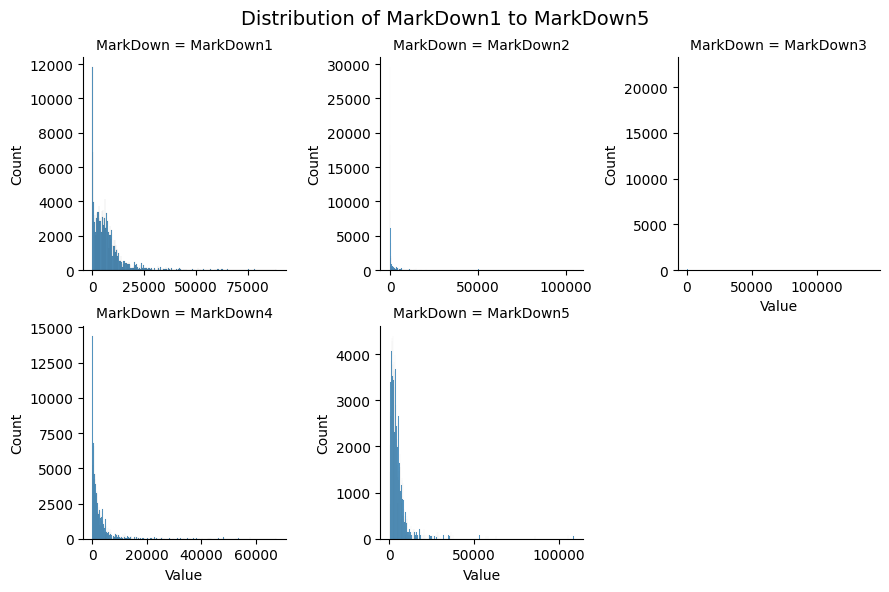

In [72]:
melted = df[[f"MarkDown{i}" for i in range(1, 6)]].melt(var_name="MarkDown", value_name="Value")

g = sns.FacetGrid(melted, col="MarkDown", col_wrap=3, height=3, sharex=False, sharey=False)
g.map(sns.histplot, "Value")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of MarkDown1 to MarkDown5", fontsize=14)
plt.show()

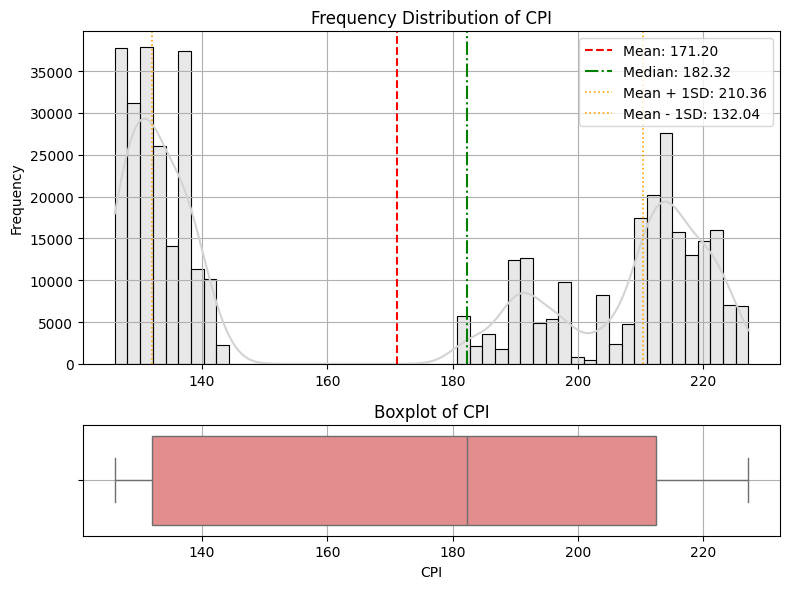

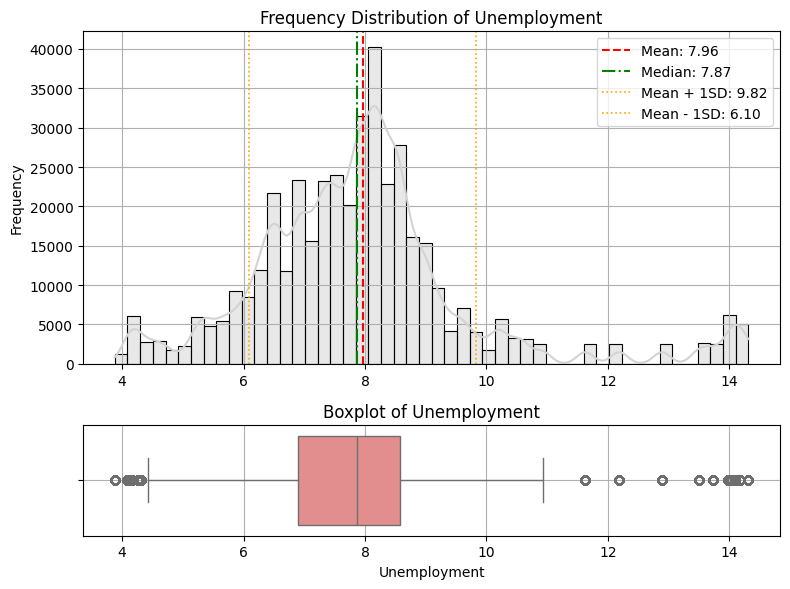

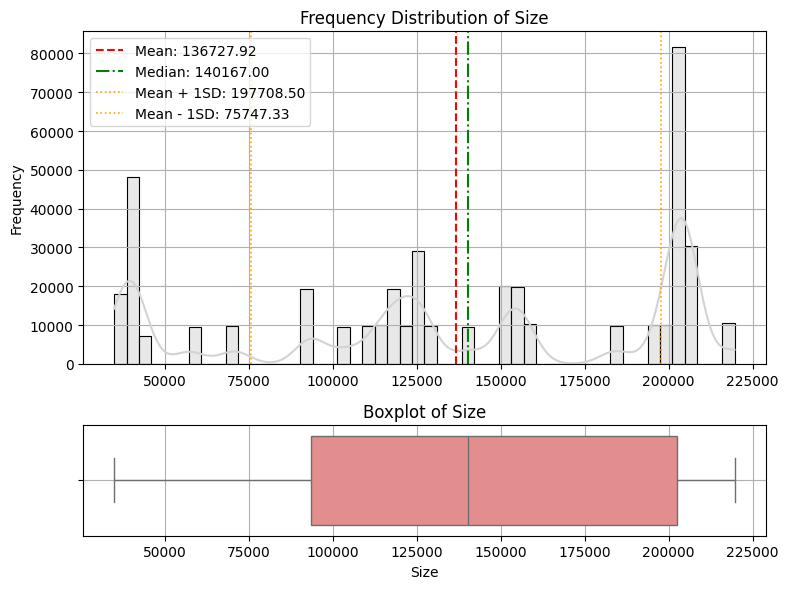

In [81]:
show_distribution_with_stats(df["CPI"])
show_distribution_with_stats(df["Unemployment"])
show_distribution_with_stats(df["Size"])

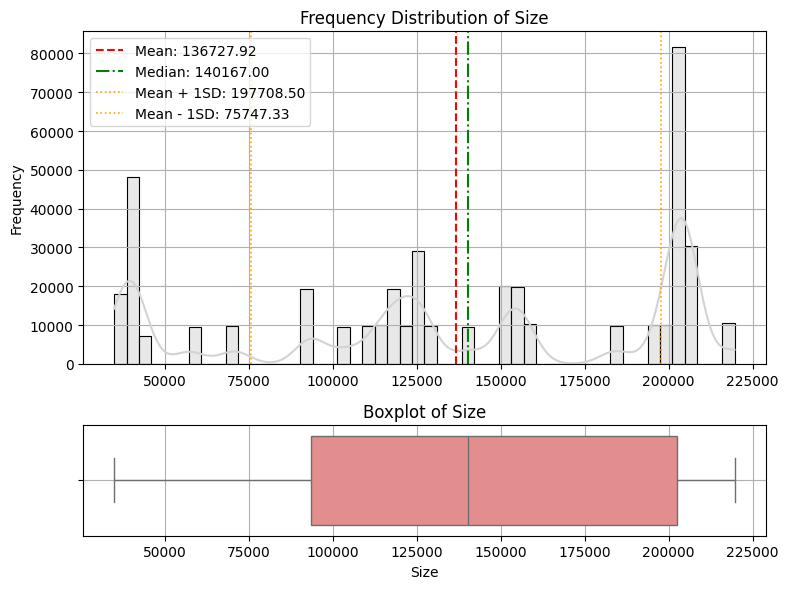

In [82]:
show_distribution_with_stats(df["Size"])

## 2. Visualise data

In [3]:
#

## 3. Clean data

In [4]:
#

## 4. Identify correlated variables

In [5]:
#

## 5. Summary